In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
import keras

In [3]:
import random
# Set the random seed for the 'random' module
random.seed(42)

# Set the random seed for 'numpy' (if used)
np.random.seed(42)

In [4]:
dataset_train = pd.read_csv('output_Result0.csv')


In [5]:
dataset_train

,F1,F2,F3,F4
0,401.203,1003.485,949.140,792.094
1,421.250,1021.578,925.547,788.015
2,425.719,1035.750,907.328,704.781
3,431.235,1042.703,900.469,766.844
4,433.390,1044.985,902.468,781.000
...,...,...,...,...
632,209.157,482.406,623.969,714.625
633,202.657,491.234,627.188,690.843
634,203.046,492.938,615.297,720.390
635,107.875,419.500,693.657,744.625


In [6]:
dataset_train=dataset_train.rolling(10).mean()

In [7]:
dataset_train

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
632,186.1922,471.4906,650.2078,736.2451
633,186.3235,473.4359,651.3828,732.0997
634,186.9906,475.8813,652.2797,733.2419
635,192.5687,486.7563,647.7283,724.8138


In [8]:
dataset_train.head(12)

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,434.3110,1037.8001,901.6749,741.1248


In [9]:
dataset_train=dataset_train.iloc[9:,:].values

In [10]:
dataset_train

array([[ 434.311 , 1037.8001,  901.6749,  741.1248],
       [ 439.2438, 1041.3719,  895.6578,  733.381 ],
       [ 439.9047, 1040.8891,  887.2797,  722.4185],
       ...,
       [ 186.9906,  475.8813,  652.2797,  733.2419],
       [ 192.5687,  486.7563,  647.7283,  724.8138],
       [ 189.6234,  481.9984,  642.6893,  723.8966]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train_scaled = sc.fit_transform(dataset_train)

In [12]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [13]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [14]:
dataset_train_result = pd.read_csv('SOH_RESULT12.csv')


In [15]:
dataset_train_result

,SOH
0,0.928244
1,0.923164
2,0.917675
3,0.917631
4,0.917323
...,...
632,0.677398
633,0.670526
634,0.666465
635,0.665487


In [16]:
dataset_train_result=dataset_train_result.rolling(10).mean()

In [17]:
dataset_train_result

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
632,0.686977
633,0.683707
634,0.680679
635,0.677815


In [18]:
dataset_train_result.head(10)

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.917701


In [19]:
dataset_train_result=dataset_train_result.iloc[9:,:].values

In [20]:
dataset_train_result

array([[0.91770118],
       [0.91610779],
       [0.91450152],
       [0.91342167],
       [0.91233057],
       [0.91072819],
       [0.90905045],
       [0.90742212],
       [0.9062877 ],
       [0.90518789],
       [0.90630852],
       [0.90744841],
       [0.90854719],
       [0.90914862],
       [0.90973227],
       [0.91088145],
       [0.91147766],
       [0.91208714],
       [0.9126322 ],
       [0.9126316 ],
       [0.91048415],
       [0.91070341],
       [0.91042974],
       [0.9096061 ],
       [0.90858091],
       [0.90727069],
       [0.90599129],
       [0.90439899],
       [0.9023522 ],
       [0.90086581],
       [0.89905556],
       [0.89458119],
       [0.89142686],
       [0.88909488],
       [0.88645091],
       [0.88357453],
       [0.88095694],
       [0.88149199],
       [0.88199975],
       [0.88171608],
       [0.88117336],
       [0.88040114],
       [0.87910614],
       [0.87779384],
       [0.8765234 ],
       [0.87522125],
       [0.87394335],
       [0.869

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_setY_scaled = sc.fit_transform(dataset_train_result)

In [22]:
training_setY_scaled

array([[0.84402423],
       [0.84008695],
       [0.83611787],
       [0.83344956],
       [0.83075345],
       [0.82679398],
       [0.82264829],
       [0.81862468],
       [0.81582152],
       [0.81310389],
       [0.81587298],
       [0.81868964],
       [0.82140471],
       [0.82289084],
       [0.82433306],
       [0.82717267],
       [0.82864591],
       [0.83015195],
       [0.83149877],
       [0.8314973 ],
       [0.82619095],
       [0.82673275],
       [0.82605649],
       [0.82402128],
       [0.82148804],
       [0.81825049],
       [0.8150891 ],
       [0.81115451],
       [0.80609691],
       [0.80242403],
       [0.79795091],
       [0.78689474],
       [0.7791004 ],
       [0.77333808],
       [0.76680483],
       [0.75969731],
       [0.75322924],
       [0.75455134],
       [0.75580603],
       [0.75510506],
       [0.75376401],
       [0.75185585],
       [0.7486559 ],
       [0.74541323],
       [0.74227398],
       [0.73905636],
       [0.73589867],
       [0.725

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(dataset_train_scaled, training_setY_scaled, test_size=0.3,shuffle=False, random_state=42)



In [24]:

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle=False, random_state=42)

In [25]:
X_train


array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.46714587, 0.62600255, 0.70547366, 0.35846986],
       [0.4637791 , 0.62283866, 0.70320174, 0.36007351],
       [0.45968124, 0.61891729, 0.70050831, 0.36243047]])

In [26]:
print(X_train.shape), print(y_train.shape),print(X_val.shape), print(y_val.shape),print(X_test.shape), print(y_test.shape)

(439, 4)
(439, 1)
(94, 4)
(94, 1)
(95, 4)
(95, 1)


(None, None, None, None, None, None)

In [27]:
X_train1 = X_train[:, 0:1]  
X_train2 = X_train[:, 1:2]  
X_train3 = X_train[:, 2:3]  
X_train4 = X_train[:, 3:] 

In [28]:
X_test1 = X_test[:, 0:1]  
X_test2 = X_test[:, 1:2]  
X_test3 = X_test[:, 2:3]  
X_test4 = X_test[:, 3:] 

In [29]:
X_val1 = X_val[:, 0:1]  
X_val2 = X_val[:, 1:2]  
X_val3 = X_val[:, 2:3]  
X_val4 = X_val[:, 3:] 

In [30]:
X_train1.shape

(439, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU,SimpleRNN
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [32]:
input_shape_1 =(X_train1.shape[1], 1)
input_shape_2 = (X_train2.shape[1], 1)
input_shape_3 =(X_train3.shape[1], 1)
input_shape_4 = (X_train4.shape[1], 1)

In [33]:
input_shape_1

(1, 1)

In [34]:
input_1 = Input(shape=input_shape_1)
input_2 = Input(shape=input_shape_2)
input_3 = Input(shape=input_shape_3)
input_4 = Input(shape=input_shape_4)

In [35]:
print(input_2)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [36]:
input_1

<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'input_1')>

In [37]:
initial_lr = 0.01
decay_rate = 0.99
decay_steps = 10000

class LearningRateUpdater(Callback):
    def __init__(self, initial_lr, decay_rate, decay_steps):
        super(LearningRateUpdater, self).__init__()
        self.initial_lr = initial_lr
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps

    def on_epoch_begin(self, epoch, logs=None):
        lr = self.initial_lr * math.pow(self.decay_rate, (epoch + 1) // self.decay_steps)
        self.model.optimizer.lr.assign(lr)
        print("Learning rate updated to:", lr)


# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_lr)




# Create the learning rate updater callback
lr_updater_callback = LearningRateUpdater(initial_lr, decay_rate, decay_steps)



In [38]:
# def lr_scheduler(epoch, lr):
#     if epoch % 10000 == 0 and epoch > 0:
#         lr *= 0.99
#     return lr
# def lr_scheduler(epoch, lr):
        
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=decay_steps, decay_rate=decay_rate, staircase=False)


#lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [39]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [40]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f'\nLearning rate after epoch {epoch} is {lr:.4f}\n')

In [41]:
# optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add,Lambda,Flatten

# Define the first parallel recurrent layer with return_sequences=True
rnn_1 = SimpleRNN(units=11)(input_1)
dropout1 = Dropout(rate=0.1)(rnn_1)

# Define the second parallel recurrent layer
rnn_2 = SimpleRNN(units=11)(input_2)
dropout2 = Dropout(rate=0.1)(rnn_2)

# Define the third parallel recurrent layer
rnn_3 = SimpleRNN(units=11)(input_3)
dropout3 = Dropout(rate=0.1)(rnn_3)

# Define the fourth parallel recurrent layer
rnn_4 = SimpleRNN(units=11)(input_4)
dropout4 = Dropout(rate=0.1)(rnn_4)

# Concatenate the outputs of the recurrent layers
merged = concatenate([dropout1, dropout2, dropout3, dropout4], axis=1)



# Flatten the merged output
flatten = Flatten()(merged)

# ...
activation_layer = Activation('tanh')(flatten)
dense1 = Dense(units=50, activation='tanh', kernel_regularizer=regularizers.l2(0.0001))(activation_layer)
dense1 = BatchNormalization()(dense1)
# dense2 = Dense(units=25, activation='relu', kernel_regularizer=regularizers.l1(0.001))(dense1)
# dense2 = BatchNormalization()(dense2)



# Define the output layer
output = Dense(units=1, activation='sigmoid')(dense1)


# Create the model with the inputs and output
regressor = Model(inputs=[input_1, input_2,input_3, input_4], outputs=output)

# Compile the model with the desired optimizer, loss function, and metrics
regressor.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with the training data
result=regressor.fit([X_train1, X_train2,X_train3, X_train4], y_train, epochs=1000, batch_size=25,validation_data=([X_val1, X_val2,X_val3, X_val4], y_val),callbacks=[LearningRateLogger()])


Epoch 1/1000
 1/18 [>.............................] - ETA: 39s - loss: 0.1043 - mae: 0.2595
Learning rate after epoch 0 is 0.0100

18/18 [==============================] - 3s 30ms/step - loss: 0.0352 - mae: 0.1387 - val_loss: 0.0471 - val_mae: 0.1779
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0117 - mae: 0.0692
Learning rate after epoch 1 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0133 - mae: 0.0729 - val_loss: 0.0223 - val_mae: 0.1159
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0079 - mae: 0.0428
Learning rate after epoch 2 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0109 - mae: 0.0633 - val_loss: 0.0243 - val_mae: 0.1042
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0074 - mae: 0.0406
Learning rate after epoch 3 is 0.0100

18/18 [==============================] - 0s 3ms/step - loss: 0.0098 - mae: 0.0608 - val_loss: 0.0349 - val_mae: 0.1288
Ep

In [43]:
regressor.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1, 1)]       0           []                               
                                                                                              

In [44]:
# Predict on the training data
trainPredict = regressor.predict([X_train1, X_train2, X_train3, X_train4])

14/14 [==============================] - 0s 846us/step


In [45]:
trainPredict.shape

(439, 1)

In [46]:
trainPredict

array([[0.83618635],
       [0.8353705 ],
       [0.82564956],
       [0.82474715],
       [0.8233608 ],
       [0.82210135],
       [0.81929123],
       [0.8164937 ],
       [0.81544036],
       [0.81418705],
       [0.81793845],
       [0.82040113],
       [0.83194596],
       [0.8358269 ],
       [0.8389309 ],
       [0.8414162 ],
       [0.843505  ],
       [0.84492   ],
       [0.84587157],
       [0.84715706],
       [0.8428359 ],
       [0.841416  ],
       [0.8366117 ],
       [0.83414704],
       [0.83167696],
       [0.8275349 ],
       [0.82399315],
       [0.82077944],
       [0.81696564],
       [0.81212753],
       [0.80641687],
       [0.79642713],
       [0.79020834],
       [0.7811092 ],
       [0.7718161 ],
       [0.7665398 ],
       [0.7598859 ],
       [0.75253475],
       [0.74376494],
       [0.74000657],
       [0.74328476],
       [0.74523336],
       [0.745184  ],
       [0.743986  ],
       [0.74226123],
       [0.7377545 ],
       [0.73469985],
       [0.730

In [47]:
# Predict on the test data
testPredict = regressor.predict([X_test1, X_test2, X_test3, X_test4])

3/3 [==============================] - 0s 1ms/step


In [48]:
valPredict = regressor.predict([X_val1, X_val2,X_val3, X_val4])

3/3 [==============================] - 0s 1ms/step


In [49]:
testPredict.shape

(95, 1)

In [50]:
RMSE = math.sqrt(mean_squared_error(y_val,valPredict))
print('Train RMSE: %.2f' % (RMSE))


Train RMSE: 0.04


In [51]:
MAE = math.sqrt(mean_absolute_error(y_val,valPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.18


In [52]:
#testPredict

In [53]:
np.set_printoptions(precision=6)
print(np.concatenate((testPredict.reshape(len(testPredict),1), y_test.reshape(len(y_test),1)),1))

[[0.572074 0.618226]
 [0.571132 0.616004]
 [0.568872 0.611976]
 [0.564554 0.606466]
 [0.559859 0.600399]
 [0.554531 0.59468 ]
 [0.544329 0.588161]
 [0.544929 0.599026]
 [0.553753 0.607449]
 [0.56167  0.614321]
 [0.567878 0.620085]
 [0.568282 0.618894]
 [0.570371 0.618589]
 [0.573565 0.617772]
 [0.578066 0.617245]
 [0.584528 0.616607]
 [0.592557 0.626267]
 [0.588167 0.615608]
 [0.575335 0.605407]
 [0.570509 0.594143]
 [0.565401 0.584187]
 [0.559872 0.571555]
 [0.553507 0.560286]
 [0.545907 0.549715]
 [0.539256 0.539831]
 [0.532605 0.530674]
 [0.526999 0.511971]
 [0.52142  0.495426]
 [0.517838 0.481608]
 [0.507818 0.470458]
 [0.497942 0.464694]
 [0.490619 0.459712]
 [0.482272 0.452987]
 [0.476967 0.447083]
 [0.473699 0.44105 ]
 [0.469725 0.434763]
 [0.465519 0.428739]
 [0.460968 0.423982]
 [0.456693 0.418628]
 [0.452659 0.412638]
 [0.449133 0.402674]
 [0.443948 0.392628]
 [0.440104 0.384978]
 [0.432745 0.377099]
 [0.425002 0.369881]
 [0.417267 0.368531]
 [0.410944 0.365946]
 [0.404837 0.

In [54]:
RMSE = math.sqrt(mean_squared_error(y_train,trainPredict))
print('Train RMSE: %.2f' % (RMSE))

RMSE = math.sqrt(mean_squared_error(y_test,testPredict))
print('Test RMSE: %.2f' % (RMSE))

Train RMSE: 0.03
Test RMSE: 0.04


In [55]:
mse=mean_squared_error(y_train,trainPredict)
print(mse)

mse2=mean_squared_error(y_test,testPredict)
print(mse2)

mse3 = mean_squared_error(y_val,valPredict)
print(mse3)

0.0007333655738380121
0.0019402030252778518
0.0015489637863609197


In [56]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_train,trainPredict))
print('Train MAE: %.2f' % (MAE))

Train MAE: 0.14


In [57]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_test,testPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.20


In [58]:
r2_score(y_train, trainPredict)

0.9889341061039572

In [59]:
r2_score(y_val, valPredict)

0.9454155112862854

In [60]:
r2_score(y_test, testPredict)

0.8799482180548619

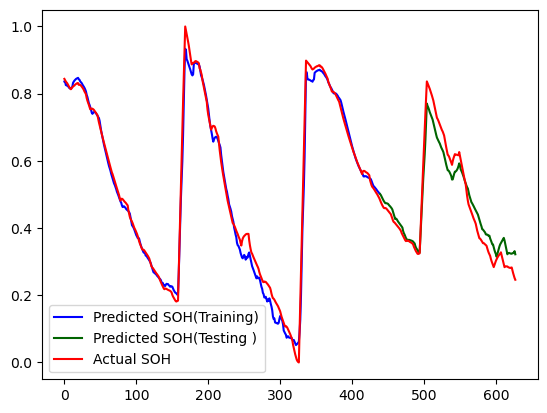

In [61]:
X_data = np.arange(439, 628)
                   
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(trainPredict,color = 'blue', label = 'Predicted SOH(Training)')
z=np.concatenate((valPredict,testPredict), axis=0)
plt.plot( X_data,z,color = 'darkgreen', label = 'Predicted SOH(Testing )')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

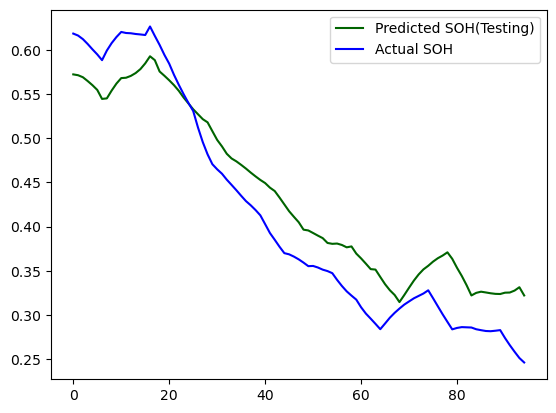

In [62]:
plt.plot(testPredict, color = 'darkgreen', label = 'Predicted SOH(Testing)')
plt.plot(y_test, color = 'blue', label = 'Actual SOH')

plt.legend()
plt.show()

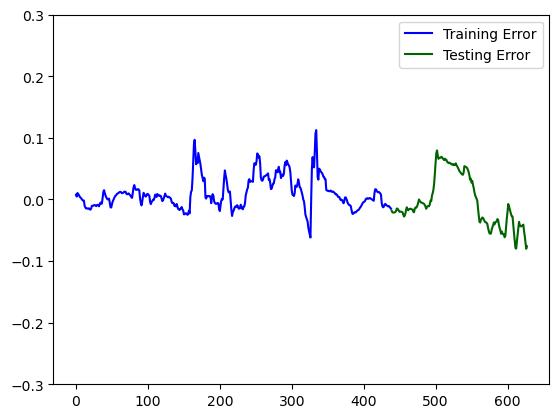

In [63]:
plt.plot(y_train-trainPredict, color = 'blue', label = 'Training Error')
#plt.plot(combined_data-combined_datap, color = 'blue', label = 'Error')
X_data = np.arange(439, 628)
z=np.concatenate((valPredict,testPredict), axis=0)
p=np.concatenate((y_val,y_test), axis=0)
plt.plot(X_data,p-z, color = 'darkgreen', label = 'Testing Error')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)
plt.legend()
plt.show() 

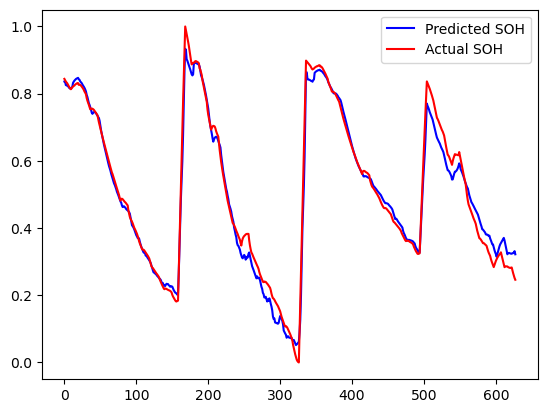

In [64]:
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(combined_datap, color = 'blue', label = 'Predicted SOH')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

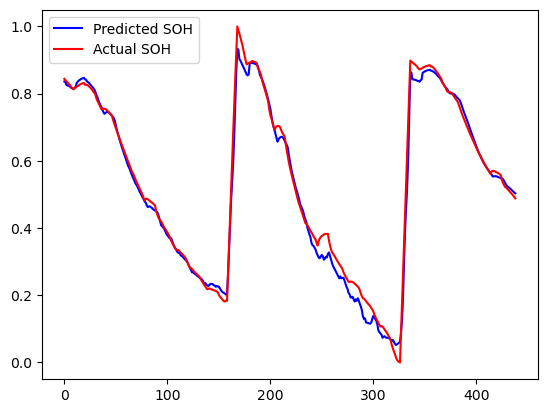

In [65]:
plt.plot(trainPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_train, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

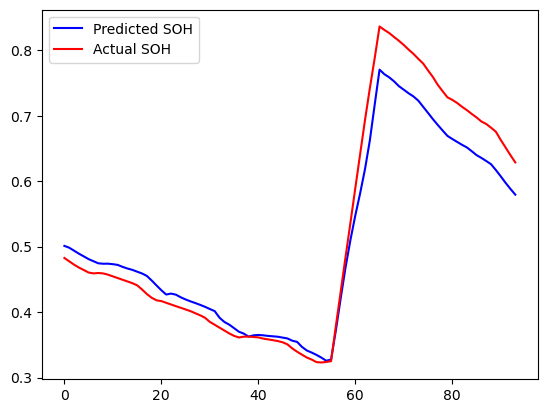

In [66]:
plt.plot(valPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_val, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

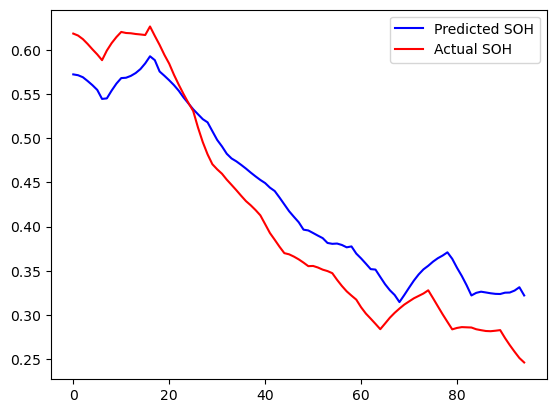

In [67]:
plt.plot(testPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_test, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

In [68]:
r2_score(combined_data, combined_datap)

0.9810968759039028